### Dependencies

In [17]:
import numpy as np
import pandas as pd
import methods.selenium_patch as selenium_patch
import matplotlib.pyplot as plt
from tqdm import tqdm
from methods.scraper import *
from methods.model_methods import *

### Test import

In [18]:
test_data = get_raw_data("NOVO-B.CO")
display(test_data)
test_data = get_data("NOVO-B.CO")
display(test_data)

,"(Fiscal Quarter, Period Ending)",Market Capitalization,Market Cap Growth,Enterprise Value,Last Close Price,PE Ratio,Forward PE,PS Ratio,PB Ratio,P/TBV Ratio,P/FCF Ratio,...,Return on Equity (ROE),Return on Assets (ROA),Return on Invested Capital (ROIC),Return on Capital Employed (ROCE),Earnings Yield,FCF Yield,Dividend Yield,Payout Ratio,Buyback Yield / Dilution,Total Shareholder Return
Current,"Feb '26 Feb 13, 2026",1379957,-49.11%,1483953,310.60,13.49,14.90,4.46,7.11,21.56,23.40,...,59.11%,16.70%,10.33%,43.00%,7.42%,4.27%,3.77%,50.53%,0.34%,4.16%
Q4 2025,"Dec '25 Dec 31, 2025",1445242,-47.87%,1513873,325.25,14.11,13.73,4.68,7.45,22.58,-,...,47.36%,16.72%,10.71%,43.00%,7.09%,4.08%,3.60%,-,0.14%,3.73%
Q3 2025,"Sep '25 Sep 30, 2025",1531428,-56.09%,1611762,344.65,14.76,14.57,4.85,9.01,24.19,23.21,...,69.15%,17.22%,11.30%,55.00%,6.78%,4.31%,-,83.29%,0.31%,0.31%
Q2 2025,"Jun '25 Jun 30, 2025",1951408,-56.25%,2028581,434.52,17.57,16.36,6.26,11.61,32.42,29.92,...,82.36%,20.31%,13.96%,55.80%,5.69%,3.34%,2.68%,-,0.42%,3.10%
Q1 2025,"Mar '25 Mar 31, 2025",2085467,-46.97%,2161946,464.37,19.93,17.20,6.88,15.05,71.52,26.35,...,85.54%,27.40%,23.28%,59.90%,5.02%,3.79%,-,121.49%,0.54%,0.54%
Q4 2024,"Dec '24 Dec 31, 2024",2772285,-10.93%,2754376,606.84,27.45,23.68,9.55,19.32,84.87,-,...,93.72%,22.05%,25.63%,58.30%,3.64%,2.66%,1.88%,-,0.49%,2.37%
Q3 2024,"Sep '24 Sep 30, 2024",3487491,21.09%,3481897,764.92,36.82,30.46,12.89,28.94,52.81,44.86,...,75.86%,23.67%,22.41%,66.70%,2.72%,2.23%,-,57.08%,0.64%,0.64%
Q2 2024,"Jun '24 Jun 30, 2024",4460088,80.98%,4477713,973.88,49.61,40.47,17.29,39.64,78.22,54.96,...,98.92%,25.96%,23.06%,65.70%,2.02%,1.82%,1.02%,-,0.83%,1.84%
Q1 2024,"Mar '24 Mar 31, 2024",3932387,61.01%,3929163,853.50,44.05,38.05,16.10,39.76,100.14,61.62,...,88.05%,23.50%,26.21%,83.70%,2.27%,1.62%,-,112.40%,0.95%,0.95%
Q4 2023,"Dec '23 Dec 31, 2023",3112331,46.89%,3091273,671.24,37.19,32.62,13.40,29.21,67.43,37.45,...,98.02%,23.17%,28.42%,72.30%,2.69%,2.67%,1.40%,-,1.00%,2.40%


,"(Fiscal Quarter, Period Ending)",Ticker,Close Price,Future Change%,Market Capitalization,Market Cap Growth,Enterprise Value,PE Ratio,Forward PE,PS Ratio,PB Ratio,...,Quick Ratio,Current Ratio,Return on Equity (ROE),Return on Assets (ROA),Return on Invested Capital (ROIC),Return on Capital Employed (ROCE),Earnings Yield,FCF Yield,Buyback Yield / Dilution,Total Shareholder Return
Current,"Feb '26 Feb 13, 2026",NOVO-B.CO,310.60,NaN,1379957.0,-49.11,1483953.0,13.49,14.9,4.46,7.11,...,0.54,0.8,59.11,16.7,10.33,43.0,7.42,4.27,0.34,4.16
Q4 2025,"Dec '25 Dec 31, 2025",NOVO-B.CO,325.25,-4.504228,1445242.0,-47.87,1513873.0,14.11,13.73,4.68,7.45,...,0.54,0.8,47.36,16.72,10.71,43.0,7.09,4.08,0.14,3.73
Q3 2025,"Sep '25 Sep 30, 2025",NOVO-B.CO,344.65,-5.628899,1531428.0,-56.09,1611762.0,14.76,14.57,4.85,9.01,...,0.53,0.78,69.15,17.22,11.3,55.0,6.78,4.31,0.31,0.31
Q2 2025,"Jun '25 Jun 30, 2025",NOVO-B.CO,434.52,-20.682592,1951408.0,-56.25,2028581.0,17.57,16.36,6.26,11.61,...,0.51,0.78,82.36,20.31,13.96,55.8,5.69,3.34,0.42,3.1
Q1 2025,"Mar '25 Mar 31, 2025",NOVO-B.CO,464.37,-6.428064,2085467.0,-46.97,2161946.0,19.93,17.2,6.88,15.05,...,0.54,0.74,85.54,27.4,23.28,59.9,5.02,3.79,0.54,0.54
Q4 2024,"Dec '24 Dec 31, 2024",NOVO-B.CO,606.84,-23.477358,2772285.0,-10.93,2754376.0,27.45,23.68,9.55,19.32,...,0.53,0.74,93.72,22.05,25.63,58.3,3.64,2.66,0.49,2.37
Q3 2024,"Sep '24 Sep 30, 2024",NOVO-B.CO,764.92,-20.666213,3487491.0,21.09,3481897.0,36.82,30.46,12.89,28.94,...,0.74,0.94,75.86,23.67,22.41,66.7,2.72,2.23,0.64,0.64
Q2 2024,"Jun '24 Jun 30, 2024",NOVO-B.CO,973.88,-21.456442,4460088.0,80.98,4477713.0,49.61,40.47,17.29,39.64,...,0.74,0.95,98.92,25.96,23.06,65.7,2.02,1.82,0.83,1.84
Q1 2024,"Mar '24 Mar 31, 2024",NOVO-B.CO,853.50,14.104277,3932387.0,61.01,3929163.0,44.05,38.05,16.1,39.76,...,0.49,0.7,88.05,23.5,26.21,83.7,2.27,1.62,0.95,0.95
Q4 2023,"Dec '23 Dec 31, 2023",NOVO-B.CO,671.24,27.152732,3112331.0,46.89,3091273.0,37.19,32.62,13.4,29.21,...,0.62,0.82,98.02,23.17,28.42,72.3,2.69,2.67,1.0,2.4


### Main program

In [19]:
tickers = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()

In [20]:
from pathlib import Path
import pickle

cache_path = Path("../data/model_results/quarterly_data_cache.pkl")
cache_path.parent.mkdir(parents=True, exist_ok=True)

force_refresh = False

if cache_path.exists() and not force_refresh:
    with open(cache_path, "rb") as f:
        data = pickle.load(f)
    print(f"Loaded cached data from {cache_path} ({len(data)} datasets)")
elif "data" in globals() and isinstance(data, list) and len(data) > 0 and not force_refresh:
    with open(cache_path, "wb") as f:
        pickle.dump(data, f)
    print(f"Saved in-memory data to cache {cache_path} ({len(data)} datasets)")
else:
    data = []
    for ticker in tqdm(tickers, smoothing=0):
        try:
            data.append(get_data(ticker, frequency="quarterly"))
        except Exception as error:
            print(f"Error for {ticker}: {error}")

    with open(cache_path, "wb") as f:
        pickle.dump(data, f)
    print(f"Saved cache to {cache_path} ({len(data)} datasets)")

Loaded cached data from ..\data\model_results\quarterly_data_cache.pkl (78 datasets)


100%|██████████| 78/78 [06:25<00:00,  4.95s/it]


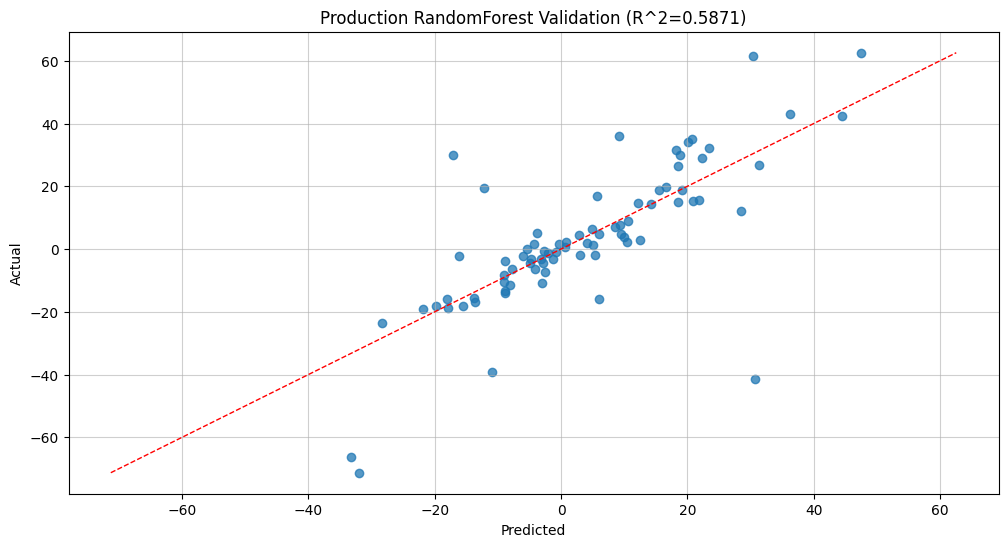

Validation R^2: 0.587122
Parameters: {'n_estimators': 6000, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': False, 'criterion': 'squared_error'}


,Rank,Ticker,Predicted Future Change%
77,78,ZEAL.CO,-17.038
76,77,DSV.CO,-16.472
75,76,GOOGL,-16.147
74,75,CEMAT.CO,-14.443
73,74,CARL-B.CO,-12.178
...,...,...,...
4,5,TER,5.656
3,4,GUBRA.CO,5.988
2,3,LLY,7.759
1,2,CBRAIN.CO,9.473


In [ ]:
# Production run: inline RandomForest model (single-cell, no functions)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

RF_BEST_PARAMS = {
    "n_estimators": 6000,
    "max_depth": 15,
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "max_features": 1.0,
    "bootstrap": False,
    "criterion": "squared_error",
}
target_col = "Future Change%"
drop_cols = ["Ticker", "Close Price", target_col]

latest_rows = []
y_vals = []
y_val_preds = []

for df in tqdm(data, smoothing=0):
    if df is None or len(df) < 3 or target_col not in df.columns:
        continue

    work = df.copy()
    y_raw = pd.to_numeric(work[target_col], errors="coerce")

    X_raw = work.drop(drop_cols, axis=1, errors="ignore").copy()
    if X_raw.shape[1] == 0:
        continue

    for col in X_raw.columns:
        if not pd.api.types.is_numeric_dtype(X_raw[col]):
            X_raw[col] = pd.Series(pd.factorize(X_raw[col].astype(str))[0], index=X_raw.index)
        X_raw[col] = pd.to_numeric(X_raw[col], errors="coerce")

    if "Close Price" in work.columns:
        close_price = pd.to_numeric(work["Close Price"], errors="coerce")
        X_raw["row_order"] = np.arange(len(X_raw), dtype=float)
        X_raw["close_price_chg1"] = close_price.pct_change().fillna(0.0)
        X_raw["close_price_ma3"] = close_price.rolling(3).mean().bfill().fillna(close_price)

    X_raw = X_raw.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    y_raw = y_raw.replace([np.inf, -np.inf], np.nan).fillna(0.0)

    if len(X_raw) < 3 or len(y_raw) < 3:
        continue

    X_pred_raw = X_raw.iloc[[0], :]
    X_val_raw = X_raw.iloc[[1], :]
    X_train_raw = X_raw.iloc[2:, :]
    y_train_raw = y_raw.iloc[2:]

    if len(X_train_raw) < 2 or y_train_raw.nunique() < 2:
        continue

    x_scaler = MinMaxScaler()
    X_train = pd.DataFrame(x_scaler.fit_transform(X_train_raw), index=X_train_raw.index, columns=X_train_raw.columns)
    X_val = pd.DataFrame(x_scaler.transform(X_val_raw), index=X_val_raw.index, columns=X_val_raw.columns)
    X_pred = pd.DataFrame(x_scaler.transform(X_pred_raw), index=X_pred_raw.index, columns=X_pred_raw.columns)

    y_scaler = MinMaxScaler()
    y_train = y_scaler.fit_transform(y_train_raw.to_frame()).ravel()

    model = RandomForestRegressor(
        n_estimators=RF_BEST_PARAMS["n_estimators"],
        max_depth=RF_BEST_PARAMS["max_depth"],
        min_samples_split=RF_BEST_PARAMS["min_samples_split"],
        min_samples_leaf=RF_BEST_PARAMS["min_samples_leaf"],
        max_features=RF_BEST_PARAMS["max_features"],
        bootstrap=RF_BEST_PARAMS["bootstrap"],
        criterion=RF_BEST_PARAMS["criterion"],
        n_jobs=-1,
    )
    model.fit(X_train, y_train)

    y_val_pred_scaled = model.predict(X_val)[0]
    y_latest_pred_scaled = model.predict(X_pred)[0]
    y_val_pred = y_scaler.inverse_transform(np.array([[y_val_pred_scaled]])).item()
    y_latest_pred = y_scaler.inverse_transform(np.array([[y_latest_pred_scaled]])).item()

    ticker = work.loc[work.index[0], "Ticker"] if "Ticker" in work.columns else "UNKNOWN"
    latest_rows.append({"Ticker": ticker, "Predicted Future Change%": y_latest_pred})
    y_vals.append(float(y_raw.iloc[1]))
    y_val_preds.append(float(y_val_pred))

predictions_table = pd.DataFrame(latest_rows).drop_duplicates(subset=["Ticker"], keep="first")
predictions_table = predictions_table.sort_values("Predicted Future Change%", ascending=False).reset_index(drop=True)
predictions_table.insert(0, "Rank", np.arange(1, len(predictions_table) + 1))
predictions_table["Predicted Future Change%"] = predictions_table["Predicted Future Change%"].round(3)

validation_r2 = r2_score(y_vals, y_val_preds) if len(y_vals) >= 2 else float("nan")

plt.figure(figsize=[12, 6])
plt.scatter(y_val_preds, y_vals, alpha=0.75)
if len(y_vals) >= 1 and len(y_val_preds) >= 1:
    min_v = float(min(min(y_val_preds), min(y_vals)))
    max_v = float(max(max(y_val_preds), max(y_vals)))
    plt.plot([min_v, max_v], [min_v, max_v], "r--", linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Production RandomForest Validation (R^2={validation_r2:.4f})")
plt.grid(alpha=0.6)
plt.show()

print(f"Validation R^2: {validation_r2:.6f}")
print("Parameters:", RF_BEST_PARAMS)

display(predictions_table.sort_values(by="Predicted Future Change%", ascending=False))